In [79]:
from fipy import *
from fipy.tools import numerix
import matplotlib.pyplot as plt

In [80]:
R = 10.  ## teljes hossz, amire lefut a program
nr = 20  ## ennyi részre lesz felosztva
dr = R / nr
mesh = Grid1D(dx=dr, nx=nr)  ## új mesh nr számú dr széles lépésközzel

## diffúziós-, konvekciós- és forrásegyütthatók
diffCoeff = 1.
convCoeff = [1.,]
sourceCoeff = 1.

## idő bevezetése
duration = Variable(10.)
dt = Variable(0.1)
t = Variable(0.)
imax = int((duration.value / dt.value) + 1)
i = 0
print(imax)

print(t.value)
print(dt.value)

## határfeltételekhez adatok
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.

## "megoldási változó" - sűrűségfv
f = CellVariable(mesh=mesh, name="sűrűségfv", value=1.) # kezdeti feltétel az egész tartományra
f.setValue(10., where= mesh.x == R/2)

## határfeltételek érvényesítése
f.constrain(valueLeft, mesh.facesLeft)
f.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
f.constrain(valueRight, mesh.facesRight)

101
0.0
0.1


1.4552859505865758
2.01960757620498 

[1.45528595 2.01960758 2.28183541 2.39930747 2.44875782 2.46606081
 2.46701541 2.45768469 2.43927036 2.41025259 2.36721684 2.30509505
 2.21721847 2.09545292 1.93066448 1.7137689  1.43756568 1.09932041
 0.70347684 0.26288821]
[1.45528595 2.01960758 2.28183541 2.39930747 2.44875782 2.46606081
 2.46701541 2.45768469 2.43927036 2.41025259 2.36721684 2.30509505
 2.21721847 2.09545292 1.93066448 1.7137689  1.43756568 1.09932041
 0.70347684 0.26288821]


C:\ProgramData\Anaconda3\lib\site-packages\fipy\viewers\matplotlibViewer\__init__.py:120: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)
C:\ProgramData\Anaconda3\lib\site-packages\fipy\viewers\matplotlibViewer\__init__.py:120: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)


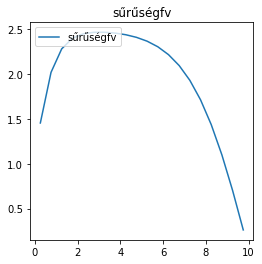

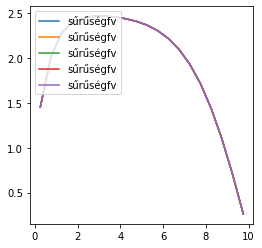

In [81]:
## az egyenlet alakja FiPy-ban az együtthatókkal
eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      + PowerLawConvectionTerm(coeff=convCoeff)
      + sourceCoeff)

# solution1D = numerix.empty(imax, CellVariable)  # 1D üres numpy array
solution1D = []  # 1D üres dinamikus lista


t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)

t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)

t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)

t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)

t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)


print(f.value[0])
print(f.value[1], "\n")
print(solution1D[0].value)
print(solution1D[1].value)
viewer = Viewer(vars=f)
viewer = Viewer(vars=solution1D)


#viewer1 = Viewer(vars=solution2D[1])
#viewer2 = Viewer(vars=solution2D[99])

1.145196565862333
1.2566518980598302 

[1.14519657 1.2566519  1.28815869 1.29681359 1.29914771 1.29976568
 1.29991767 1.29993045 1.29987036 1.29970735 1.29932345 1.29843408
 1.29638344 1.29167793 1.28095539 1.25677885 1.20315768 1.08734924
 0.84832897 0.39556772]
[1.14519657 1.2566519  1.28815869 1.29681359 1.29914771 1.29976568
 1.29991767 1.29993045 1.29987036 1.29970735 1.29932345 1.29843408
 1.29638344 1.29167793 1.28095539 1.25677885 1.20315768 1.08734924
 0.84832897 0.39556772]


C:\ProgramData\Anaconda3\lib\site-packages\fipy\viewers\matplotlibViewer\__init__.py:120: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)
C:\ProgramData\Anaconda3\lib\site-packages\fipy\viewers\matplotlibViewer\__init__.py:120: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)


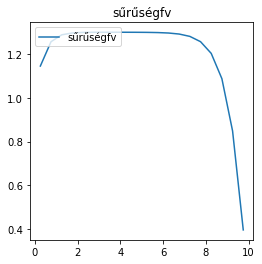

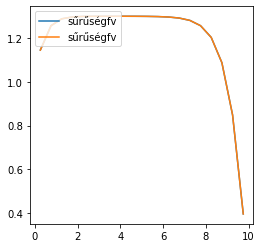

In [82]:
R = 10.  ## teljes hossz, amire lefut a program
nr = 20  ## ennyi részre lesz felosztva
dr = R / nr
mesh = Grid1D(dx=dr, nx=nr)  ## új mesh nr számú dr széles lépésközzel

## diffúziós-, konvekciós- és forrásegyütthatók
diffCoeff = 1.
convCoeff = [1.,]
sourceCoeff = 1.

## idő bevezetése
duration = Variable(10.)
dt = Variable(0.1)
t = Variable(0.)
imax = int((duration.value / dt.value) + 1)
i = 0

## határfeltételekhez adatok
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.

## "megoldási változó" - sűrűségfv
f = CellVariable(mesh=mesh, name="sűrűségfv", value=1.) # kezdeti feltétel az egész tartományra
f.setValue(10., where= mesh.x == R/2)

## határfeltételek érvényesítése
f.constrain(valueLeft, mesh.facesLeft)
f.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
f.constrain(valueRight, mesh.facesRight)

## az egyenlet alakja FiPy-ban az együtthatókkal
eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      + PowerLawConvectionTerm(coeff=convCoeff)
      + sourceCoeff)

# solution1D = numerix.empty(imax, CellVariable)  # 1D üres numpy array
solution1D = []  # 1D üres dinamikus lista


t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)

t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)


print(f.value[0])
print(f.value[1], "\n")
print(solution1D[0].value)
print(solution1D[1].value)
viewer = Viewer(vars=f)
viewer = Viewer(vars=solution1D)